### Some prerequisite

In [114]:
# set random seed
import random
random.seed(10)


### Setting Hyperparameters

In [115]:
# hyperparameters:
LB = -15
UB = 15
UNIT = 1
NO_UPDATE_TIMES = 10e5

# Define iteration numbers
n = 2

# Set temperature reduction factor
c = 0.5

### Define Objective Function

In [116]:
import numpy as np

# Define the objective function
def f(x_1, x_2):
    return 6*(x_1**2)-6*x_1*x_2+2*(x_2**2)-x_1-2*x_2

print('objective function declaration succeed')

objective function declaration succeed


---
## 3D visualization

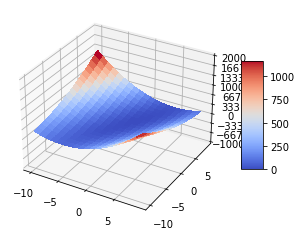

In [117]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

# set range
x_1 = np.arange(-10, 10, UNIT)
x_2 = np.arange(-10, 10, UNIT)
X, Y = np.meshgrid(x_1, x_2) # meshgrid: 接受兩個1D向量，生成一個座標矩陣
Z = f(X, Y)

# Plt the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)

# Customize the z axis.
ax.set_zlim(-1000,2000)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically

# Label for axes
plt.xlabel = '$x_1$'
plt.ylabel = '$x_2$'

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


---
### Define method "get_random": In order to sample form uniform distribution

In [118]:
def get_random(low, high, unit):
    return np.random.uniform(low, high, unit)

---
### Generating Initial Temperature, Initial points (where we start doing SA)

In [119]:
# Initialization

# Define Initial Temperature
## randomly generate four points,
## and set initial temperature as their mean of objective function values.

import numpy as np
rand_4pts = []
for j in range(4):
    x_1 = get_random(LB, UB+0.1 ,1)
    x_2 = get_random(LB, UB+0.1 ,1)
    rand_4pts.append(f(x_1, x_2))
#print(rand_4pts)

init_temp = np.mean(rand_4pts)
objf_value = []
objf_value.append(init_temp)
print(f'The mean objective value of four sample pts is: {init_temp}')

# select an initial design point
x_1 = get_random(LB, UB+0.1 ,1)
x_2 = get_random(LB, UB+0.1 ,1)

X = []

X.append([x_1, x_2])
print(f'randomly select an initial design point: {x_1, x_2}')

objf_value.append(f(x_1, x_2))
print(f'objective function value of $X_1$ is: {objf_value}')




The mean objective value of four sample pts is: 361.1597630099781
randomly select an initial design point: (array([-8.34420518]), array([8.91576186]))
objective function value of $X_1$ is: [361.1597630099781, array([1013.61853905])]


---
### Print the design points at each states

In [121]:
from numpy import array
import numpy as np
X = np.array(X)
print(X)
#print(array(X).shape)
#print(len(X))

[[[-8.34420518]
  [ 8.91576186]]

 [[-7.36032177]
  [ 4.21752448]]

 [[-2.56124313]
  [ 3.94827834]]

 [[ 1.30798963]
  [ 3.01733655]]

 [[ 1.83023964]
  [ 3.07839874]]

 [[ 1.60496044]
  [ 2.5559895 ]]

 [[ 1.0001151 ]
  [ 1.73093913]]

 [[ 1.38617576]
  [ 2.23486777]]

 [[ 1.29404284]
  [ 2.52333069]]

 [[ 1.38244194]
  [ 2.65032993]]

 [[ 1.40835866]
  [ 2.65787106]]

 [[ 1.39380443]
  [ 2.59086823]]

 [[ 1.29128602]
  [ 2.46621055]]

 [[ 1.37596171]
  [ 2.56629916]]

 [[ 1.31379061]
  [ 2.4392896 ]]

 [[ 1.34008977]
  [ 2.51244015]]

 [[ 1.33793285]
  [ 2.50246866]]

 [[ 1.33056509]
  [ 2.49814834]]]


---
### Print the objective function values at each step
* In order to check the solution is indeed decending.

In [122]:
SA = []
for i in range(len(X)):
    result = f(X[i][0], X[i][1])
    print(result)
    SA.append(float(result))
print(SA)

[1013.61853905]
[545.80034135]
[125.87729277]
[-2.54887129]
[-2.74054109]
[-2.8089589]
[-2.8551417]
[-2.92526114]
[-3.15081552]
[-3.15129352]
[-3.15411329]
[-3.16118148]
[-3.16229989]
[-3.16392979]
[-3.16412233]
[-3.16658756]
[-3.16659567]
[-3.16664459]
[1013.6185390518068, 545.8003413497564, 125.87729276956894, -2.548871293908147, -2.740541092381541, -2.8089588979835014, -2.85514170025386, -2.925261140723123, -3.150815519846928, -3.1512935194542626, -3.1541132927447704, -3.1611814839997816, -3.162299886162659, -3.1639297916907836, -3.1641223327376764, -3.1665875619368826, -3.1665956727445117, -3.1666445853868375]


---
### Finally, print the updated path on the contour graph
* We can see that the best solutions at each step is approaching to the location of minimum value on the curve of objective function.

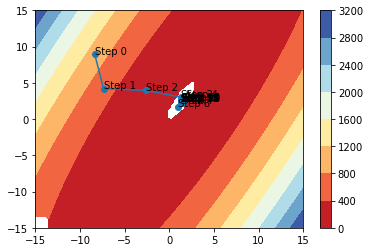

In [123]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

fig = plt.figure()

# 假設不同 state 的位置
# plot1 = fig.add_subplot(121)

plt.plot(X[:,0], X[:,1], 'o-')

# set dot labels
for i in range(len(X)):
    plt.annotate(f'Step {i}', (X[i,0], X[i,1]))


# 設定背景圖
N = 100
x = np.linspace(min(np.min(X),LB), max(np.max(X),UB), N)
y = np.linspace(min(np.min(X),LB), max(np.max(X),UB), N)

X, Y = np.meshgrid(x, y)


z = 6*(X**2)-6*X*Y+2*(Y**2)-X-2*Y

# Put in some negative values (lower left corner) to cause trouble with logs:
z[:5, :5] = -1

# The following is not strictly essential, but it will eliminate
# a warning.  Comment it out to see the warning.
z = ma.masked_where(z <= 0, z)

cs = plt.contourf(X, Y, z, cmap='RdYlBu')

# add a colorbar
cbar = fig.colorbar(cs)

plt.show()

In [124]:
import json
with open('result\First_Part\SA.json', 'w') as f:
    json.dump(SA, f)